EXPLORATORY DATA ANALYSIS TO DETERMINE THE IMPACT OF COVID-19 IN UNEMPLOYMENT.

I approached this analysis as a Case Study meaning I formulated 5 hypotheses questions that map to a standard "Drill-down" framework. These question aim to look at the trends over time using trend analysis(Time Series Analysis)

Step 1:
By using trend analysis, which is always the first step in financial or economic analysis, we are able to understand the "baseline vs shock".Below we are going to read our cleaned dataset and begin the first step of EDA analysis. This step is going to be guided by our analysis question "HOW HAS THE NATIONAL EMPLOYMENT RATE CHANGED OVER TIME?"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px


In [2]:
df = pd.read_csv('unemployment_data_India_cleaned.csv')

In [3]:
df.head()

,Region,Date,Frequency,Unemployment_Rate,Employed,Participation_Rate,Area
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural


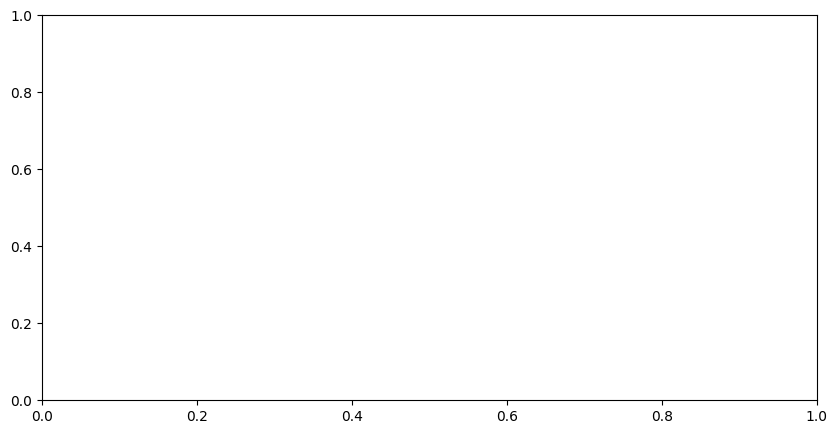

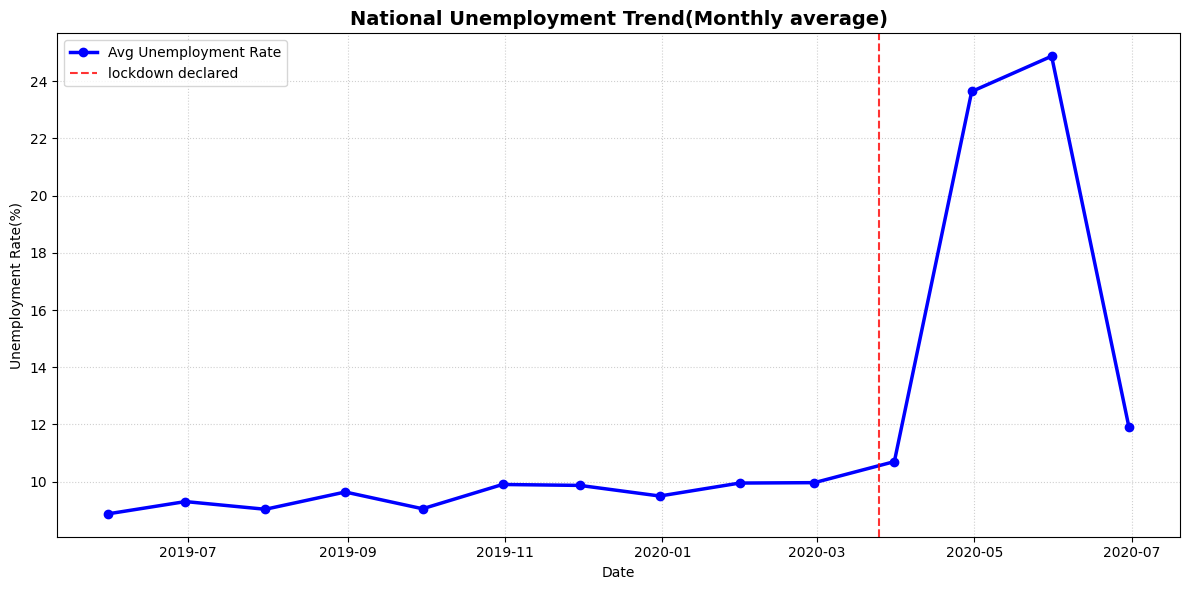

In [4]:
df["Date"] = pd.to_datetime(df["Date"])

fig, ax = plt.subplots(figsize = (10,5))

#Aggregate to get the national average
national_avg = df.groupby('Date')['Unemployment_Rate'].mean().reset_index()

#formatting the x-axis

#plot the line plot for the Q1
fig, ax = plt.subplots(figsize= (12,6))

ax.plot(national_avg['Date'], national_avg['Unemployment_Rate'], marker = "o", color='blue', linewidth = 2.5, label='Avg Unemployment Rate')

#Adding the lockdown reference line
lockdown_date = pd.to_datetime('2020-03-25')
ax.axvline(lockdown_date, color='red',linestyle='--', alpha=0.8, label='lockdown declared')

# set labels and title
ax.set_title("National Unemployment Trend(Monthly average)", fontsize= 14, fontweight= 'bold')
ax.set_ylabel('Unemployment Rate(%)')
ax.set_xlabel("Date")
ax.legend()
ax.grid(True, linestyle=':', alpha = 0.6)

plt.tight_layout()
#Save the figure 
fig.savefig('Q1_linegraph_oop.png')
plt.show()

EXPLANATION
To assess the impact of COVID-19, I first performed a Time Series Analysis. As you can see in Figure 1, the unemployment rate was relatively stable in 2019. However, coincident with the national lockdown in late March 2020, we observe a dramatic structural break in the data, with unemployment peaking in April and May. This confirms that the economic shock was external and sudden, rather than a gradual economic decline

ANALYSIS QUESTION TWO

For this question I applied Risk Segmentation to determine which states are high-risk vs resilient. This is crucial, for instance, in resource allocation where as an analyst I have to identify the hardest-hit areas and give them more preference

For visualisation in this segment I chose to use a HORIZONTAL BAR CHART(SORTED). Why? My data has many states with many names and using a vertical bar chart would mean that the state names overlap. A horizontal bar chart makes the label readable and instantly creates a "Leaderboard" of the hardest-hit areas.

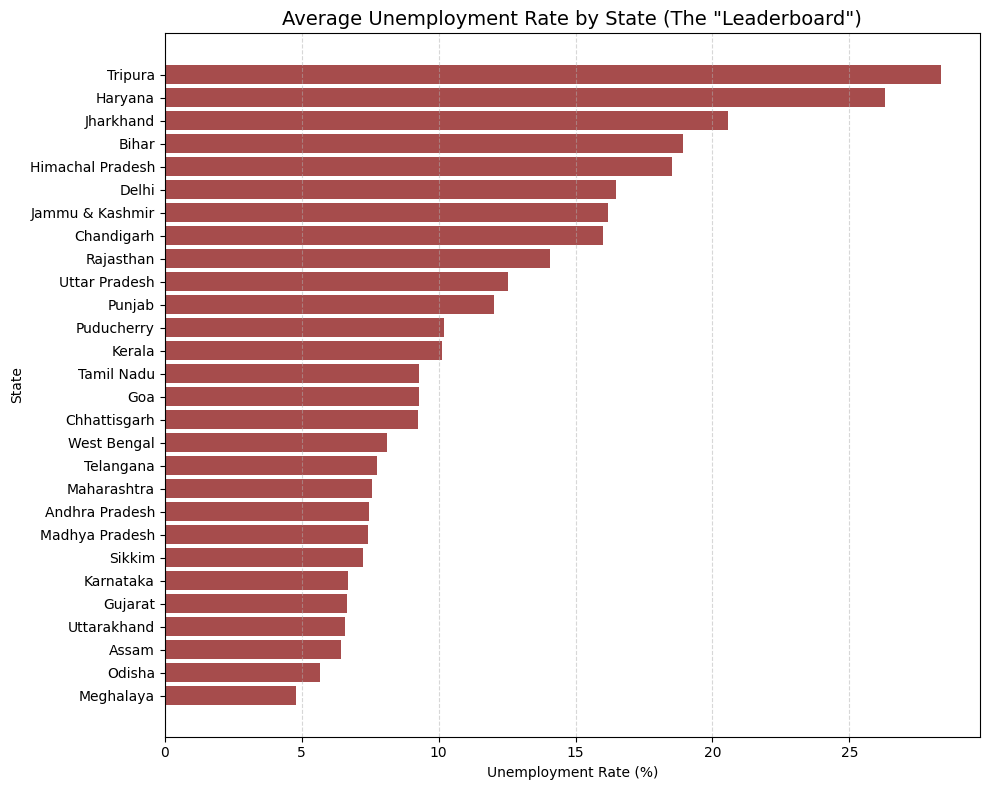

In [5]:
# Prepare Data: Group by Region, take Mean, and SORT (Crucial for Bar Charts)
state_avg = df.groupby('Region')['Unemployment_Rate'].mean().sort_values(ascending=True)

# OOP Plotting
fig, ax = plt.subplots(figsize=(10, 8))

# Horizontal Bar Plot
# color='maroon' signifies 'bad' (high unemployment)
ax.barh(state_avg.index, state_avg.values, color='maroon', alpha=0.7)

# Formatting
ax.set_title('Average Unemployment Rate by State (The "Leaderboard")', fontsize=14)
ax.set_xlabel('Unemployment Rate (%)')
ax.set_ylabel('State')
ax.grid(axis='x', linestyle='--', alpha=0.5)

# Tight layout prevents label clipping
plt.tight_layout()
plt.show()

EXPLANATION

To drill down further, I segmented the data by State. As shown in Figure 2, there is significant heterogeneity across the country. States like Tripura and Haryana peaked at over 50% unemployment, indicating a complete collapse of their local labor markets. In contrast, other states remained relatively resilient. This suggests that states with heavier reliance on informal sectors or tourism were disproportionately affected compared to agricultural states

Question 3: Urban vs. Rural Impact

Did the crisis impact Urban and Rural economies differently?

This is Sectoral Analysis. Urban areas typically represent services/manufacturing, while Rural represents agriculture. This analysis tests the "Urban-Centric" nature of the lockdown. Since lockdowns froze mobility and shops (Urban), but often allowed farming (Rural), we expect a divergence.

Best Chart: Box Plot.

Why: A Box Plot shows the Risk and Volatility. It tells us if the unemployment was consistently high or if it swung wildly (volatile).

C:\Users\hicks\AppData\Local\Temp\ipykernel_11680\3594751120.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = ax.boxplot([urban_data, rural_data], labels=['Urban', 'Rural'], patch_artist=True)


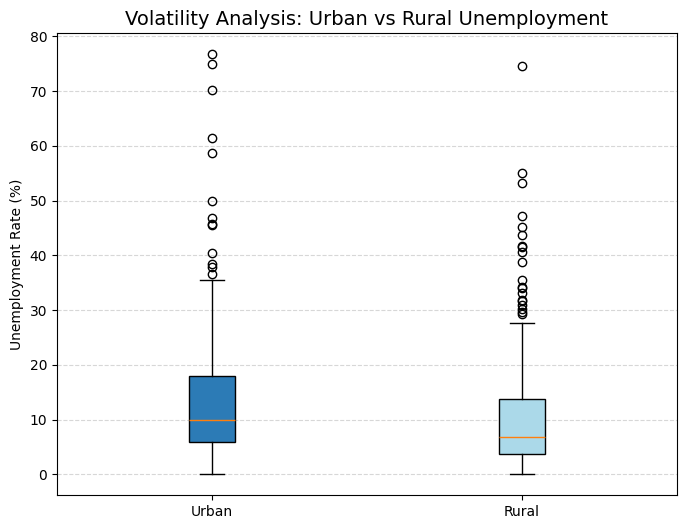

In [7]:
# Prepare Data: Create a list of arrays for the boxplot
urban_data = df[df['Area'] == 'Urban']['Unemployment_Rate']
rural_data = df[df['Area'] == 'Rural']['Unemployment_Rate']

# OOP Plotting
fig, ax = plt.subplots(figsize=(8, 6))

# Box Plot
# 'patch_artist=True' allows us to fill the box with color
box = ax.boxplot([urban_data, rural_data], labels=['Urban', 'Rural'], patch_artist=True)

# Customizing Colors (Make it look professional)
colors = ['#2c7bb6', '#abd9e9'] # Dark Blue (Urban), Light Blue (Rural)
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Formatting
ax.set_title('Volatility Analysis: Urban vs Rural Unemployment', fontsize=14)
ax.set_ylabel('Unemployment Rate (%)')
ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

The Box Plot in Figure 3 reveals a higher volatility and median unemployment rate in Urban areas compared to Rural areas. This aligns with our macroeconomic understanding: the lockdown primarily paralyzed urban-centric industries like retail, transport, and manufacturing, while the agricultural sector provided a 'safety buffer' for the rural economy."

Question 4: The Economic Driver (Correlation)
(Is there a relationship between Labour Participation and Unemployment)"
• This is Correlation/Driver Analysis. We are testing a hypothesis: When jobs disappear, do people keep looking, or do they quit the workforce? This is crucial for understanding the "real" health of the economy.
• It identifies the "Discouraged Worker Effect." A negative correlation means that as unemployment rises, people stop looking for jobs (participation drops). This means the "real" unemployment situation is actually worse than the headline number suggests because many people just gave up.


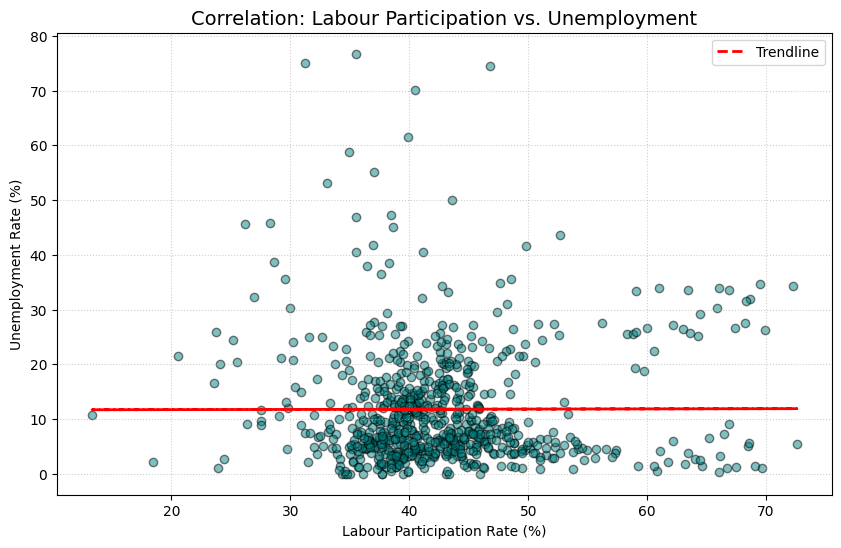

In [8]:
import numpy as np

# OOP Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter Plot
scatter = ax.scatter(df['Participation_Rate'], df['Unemployment_Rate'], 
                     color='teal', alpha=0.5, edgecolors='k')

# Add a Trendline (The "Analyst" Touch)
# We fit a linear polynomial (degree 1) to the data
z = np.polyfit(df['Participation_Rate'], df['Unemployment_Rate'], 1)
p = np.poly1d(z)
ax.plot(df['Participation_Rate'], p(df['Participation_Rate']), "r--", linewidth=2, label='Trendline')

# Formatting
ax.set_title('Correlation: Labour Participation vs. Unemployment', fontsize=14)
ax.set_xlabel('Labour Participation Rate (%)')
ax.set_ylabel('Unemployment Rate (%)')
ax.legend()
ax.grid(True, linestyle=':', alpha=0.6)

plt.show()

The scatter plot shows a negative correlation. This is a critical finding: it suggests a strong 'Discouraged Worker Effect' during the pandemic. As job opportunities vanished, a significant portion of the workforce exited the market entirely rather than remaining unemployed, effectively shrinking the economy's productive capacity.

Question 5: Geographical Heatmap
"Where is the crisis geographically concentrated?"
• This is Spatial/Geospatial Analysis. It helps visualize clusters. Is the problem "The North," "The Coast," or "Random"?
• It highlights Systemic Hotspots. If you see a cluster of red dots in one region, it implies a regional systemic failure (e.g., a supply chain corridor collapsing).


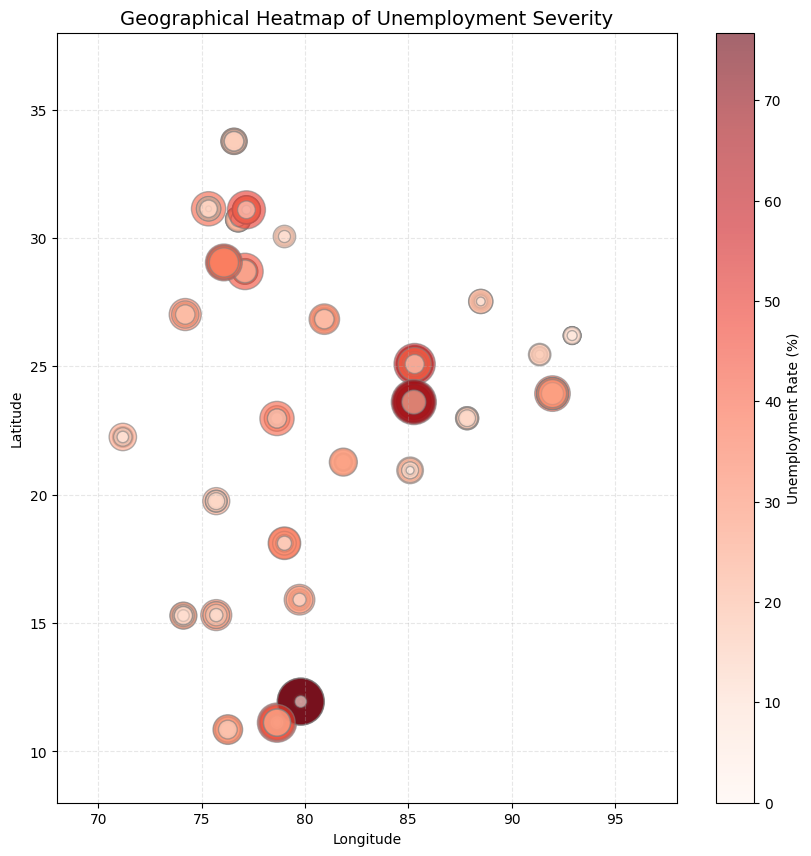

In [10]:
# 2. CREATE THE 'df_map' VARIABLE
# We manually map the coordinates for Indian states because the dataset doesn't have them
state_coords = {
    'Andhra Pradesh': (15.91, 79.74), 'Assam': (26.20, 92.93), 'Bihar': (25.09, 85.31),
    'Chhattisgarh': (21.27, 81.86), 'Delhi': (28.70, 77.10), 'Goa': (15.29, 74.12),
    'Gujarat': (22.25, 71.19), 'Haryana': (29.05, 76.08), 'Himachal Pradesh': (31.10, 77.17),
    'Jammu & Kashmir': (33.77, 76.57), 'Jharkhand': (23.61, 85.27), 'Karnataka': (15.31, 75.71),
    'Kerala': (10.85, 76.27), 'Madhya Pradesh': (22.97, 78.65), 'Maharashtra': (19.75, 75.71),
    'Meghalaya': (25.46, 91.36), 'Odisha': (20.95, 85.09), 'Puducherry': (11.94, 79.80),
    'Punjab': (31.14, 75.34), 'Rajasthan': (27.02, 74.21), 'Sikkim': (27.53, 88.51),
    'Tamil Nadu': (11.12, 78.65), 'Telangana': (18.11, 79.01), 'Tripura': (23.94, 91.98),
    'Uttar Pradesh': (26.84, 80.94), 'Uttarakhand': (30.06, 79.01), 'West Bengal': (22.98, 87.85),
    'Chandigarh': (30.73, 76.77)
}

# Apply the mapping
df['Latitude'] = df['Region'].map(lambda x: state_coords.get(x, (None, None))[0])
df['Longitude'] = df['Region'].map(lambda x: state_coords.get(x, (None, None))[1])

# Create the specific dataframe for the map (dropping rows where we couldn't find coords)
df_map = df.dropna(subset=['Latitude', 'Longitude'])
# OOP Plotting
fig, ax = plt.subplots(figsize=(10, 10))

# Scatter Plot (Map Proxy)
# s = Size of bubble (multiplied by 10 for visibility)
# c = Color of bubble (mapped to rate)
sc = ax.scatter(df_map['Longitude'], df_map['Latitude'], 
                s=df_map['Unemployment_Rate']*15, 
                c=df_map['Unemployment_Rate'], 
                cmap='Reds', alpha=0.6, edgecolors='grey')

# Add a Colorbar (Essential for Heatmaps)
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('Unemployment Rate (%)')

# Formatting
ax.set_title('Geographical Heatmap of Unemployment Severity', fontsize=14)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.grid(True, linestyle='--', alpha=0.3)

# Optional: Limit axis to zoom in on India
ax.set_xlim(68, 98)
ax.set_ylim(8, 38)

plt.show()

C:\Users\hicks\AppData\Local\Temp\ipykernel_11680\2507485164.py:3: DeprecationWarning: *scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/
  fig = px.scatter_mapbox(


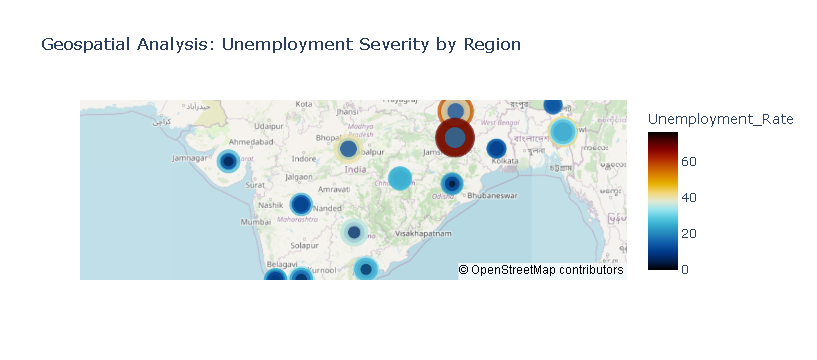

In [11]:
# Generate the Interactive Map (Plotly)
# We use 'open-street-map' so you don't need an API token
fig = px.scatter_mapbox(
    df_map,
    lat="Latitude",
    lon="Longitude",
    color="Unemployment_Rate",
    size="Unemployment_Rate",
    hover_name="Region",
    hover_data=["Unemployment_Rate"],
    color_continuous_scale=px.colors.cyclical.IceFire, # Professional color scale
    size_max=30, # Max bubble size
    zoom=3.5,    # Initial Zoom
    center={"lat": 20.5937, "lon": 78.9629}, # Center of India
    mapbox_style="open-street-map",
    title="Geospatial Analysis: Unemployment Severity by Region"
)

# Show the interactive plot
fig.show()

# To save as HTML (to share with others)
fig.write_html("unemployment_map.html")

Finally, Figure 5 and 6 provides a geospatial view of the crisis. By mapping unemployment severity by latitude and longitude, we can observe distinct clusters. The visualization proves that the crisis was not geographically isolated; however, severe hotspots emerged in both the Northern industrial belts and Southern coastal territories, indicating that neither industrial nor service-based economies were spared